In [61]:
import pandas as pd
import numpy as np

In [62]:
df = pd.read_csv('/Users/anaiyoshikazu/stock_docu/datasets/時価総額上位500社 - シート1.csv')

df.columns

Index(['銘柄コード', '会社名', '時価総額', 'PER(会予)', 'PBR', '配当利回り(会予)', '売上高', '売上総利益率',
       '営業CF/売上比率', '販管費/売上比率', '営業利益', '営業利益率', '当期純利益', '純利益率', 'ROE',
       '自己資本比率', '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額', 'DEレシオ', '流動比率',
       '総資産', '現金及び預金', '売上債権', '売上債権回転数', '棚卸資産', '棚卸資産回転数', '有形固定資産', '固定負債',
       '有利子負債', '純有利子負債', '純資産', '自己資本', 'フリーCF', '研究開発/売上比率'],
      dtype='object')

In [63]:

# すでにDataFrameがあると仮定して、すべての文字列型・object型のカラムでカンマを削除
df = df.applymap(lambda x: str(x).replace(',', '') if isinstance(x, (str)) else x)

# 数値型に変換できるものは自動で変換
df = df.apply(pd.to_numeric, errors='ignore')

# 結果の確認
df.dtypes

銘柄コード           object
会社名             object
時価総額             int64
PER(会予)        float64
PBR            float64
配当利回り(会予)      float64
売上高            float64
売上総利益率         float64
営業CF/売上比率      float64
販管費/売上比率       float64
営業利益           float64
営業利益率          float64
当期純利益          float64
純利益率           float64
ROE            float64
自己資本比率         float64
有利子負債/総資産      float64
有利子負債/時価総額     float64
純有利子負債/時価総額    float64
DEレシオ          float64
流動比率           float64
総資産            float64
現金及び預金         float64
売上債権           float64
売上債権回転数        float64
棚卸資産           float64
棚卸資産回転数        float64
有形固定資産         float64
固定負債           float64
有利子負債          float64
純有利子負債         float64
純資産            float64
自己資本           float64
フリーCF            int64
研究開発/売上比率      float64
dtype: object

In [64]:
df[df['純有利子負債'].isna()][['銘柄コード' ,'会社名']]


,銘柄コード,会社名
32,7182,ゆうちょ銀行
44,4901,富士フイルムHD
47,6301,小松製作所
55,8591,オリックス
95,8604,野村HD
194,6645,オムロン
428,6269,三井海洋開発


In [65]:
df['ネットキャッシュ'] = -df['純有利子負債']
df.drop(columns=['純有利子負債'], inplace=True)

df[['会社名', 'ネットキャッシュ']]

,会社名,ネットキャッシュ
0,本たばこ産業,-522010.0
1,中外製薬,-944550.0
2,リクルートHD,-674810.0
3,立製作所,-28944.0
4,ソニーG,-552251.0
...,...,...
495,イズミ,-123737.0
496,メイテックGHD,-46110.0
497,王将フードサービス,-29469.0
498,メタプラネット,-10955.0


In [66]:
df['有形固定資産'] = df['有形固定資産'].fillna(0)
df['固定負債'] = df['固定負債'].fillna(0)
df['有利子負債/総資産'] = df['有利子負債/総資産'].fillna(0)

df.isna().sum()

銘柄コード            0
会社名              0
時価総額             0
PER(会予)         51
PBR              1
配当利回り(会予)       75
売上高              2
売上総利益率          59
営業CF/売上比率        6
販管費/売上比率        59
営業利益            53
営業利益率           55
当期純利益            1
純利益率             2
ROE             22
自己資本比率           1
有利子負債/総資産        0
有利子負債/時価総額       0
純有利子負債/時価総額      0
DEレシオ           44
流動比率            46
総資産              1
現金及び預金          41
売上債権           147
売上債権回転数        147
棚卸資産            78
棚卸資産回転数         91
有形固定資産           0
固定負債             0
有利子負債           44
純資産              1
自己資本             1
フリーCF            0
研究開発/売上比率      231
ネットキャッシュ         7
dtype: int64

## データの作成

### 固定ネットキャッシュ : 現預金 - 固定負債
### 固定ネットキャッシュ比率 : 固定ネットキャッシュ / 総資産

In [67]:
# 固定ネットキャッシュ
df['固定ネットキャッシュ'] = df['現金及び預金'] - df['固定負債']
# 固定ネットキャッシュ比率
df['固定ネットキャッシュ比率'] = (df['固定ネットキャッシュ'] / df['総資産']) * 100

df[['会社名', '現金及び預金', '固定負債', '総資産', '固定ネットキャッシュ', 
    '固定ネットキャッシュ比率']]

,会社名,現金及び預金,固定負債,総資産,固定ネットキャッシュ,固定ネットキャッシュ比率
0,本たばこ産業,1084567.0,2373398.0,8370732.0,-1288831.0,-15.396873
1,中外製薬,423419.0,23832.0,2139482.0,399587.0,18.676811
2,リクルートHD,871812.0,338888.0,2908790.0,532924.0,18.321158
3,立製作所,866242.0,1345551.0,13284813.0,-479309.0,-3.607947
4,ソニーG,2491949.0,16380543.0,35991547.0,-13888594.0,-38.588489
...,...,...,...,...,...,...
495,イズミ,15717.0,143442.0,569611.0,-127725.0,-22.423198
496,メイテックGHD,46110.0,17449.0,84898.0,28661.0,33.759335
497,王将フードサービス,34969.0,6386.0,91425.0,28583.0,31.263877
498,メタプラネット,294.0,1966.0,30325.0,-1672.0,-5.513603


### ネットキャッシュ比率

In [68]:
df['ネットキャッシュ比率'] = (df['ネットキャッシュ'] / df['総資産']) * 100

df[['会社名', 'ネットキャッシュ', '総資産', 'ネットキャッシュ比率']]

,会社名,ネットキャッシュ,総資産,ネットキャッシュ比率
0,本たばこ産業,-522010.0,8370732.0,-6.236133
1,中外製薬,-944550.0,2139482.0,-44.148537
2,リクルートHD,-674810.0,2908790.0,-23.198993
3,立製作所,-28944.0,13284813.0,-0.217873
4,ソニーG,-552251.0,35991547.0,-1.534391
...,...,...,...,...
495,イズミ,-123737.0,569611.0,-21.723071
496,メイテックGHD,-46110.0,84898.0,-54.312234
497,王将フードサービス,-29469.0,91425.0,-32.232978
498,メタプラネット,-10955.0,30325.0,-36.125309


### 有形固定資産/総資産

In [69]:
df['有形固定資産/総資産'] = (df['有形固定資産'] / df['総資産']) * 100

df[['会社名', '有形固定資産', '総資産', '有形固定資産/総資産']]

,会社名,有形固定資産,総資産,有形固定資産/総資産
0,本たばこ産業,907700.0,8370732.0,10.843735
1,中外製薬,448498.0,2139482.0,20.962925
2,リクルートHD,58041.0,2908790.0,1.995366
3,立製作所,1341537.0,13284813.0,10.098275
4,ソニーG,1526777.0,35991547.0,4.242043
...,...,...,...,...
495,イズミ,344469.0,569611.0,60.474429
496,メイテックGHD,4147.0,84898.0,4.884685
497,王将フードサービス,38603.0,91425.0,42.223681
498,メタプラネット,975.0,30325.0,3.215169


### 固定負債/総資産

In [70]:
df['固定負債/総資産'] = (df['固定負債'] / df['総資産'] ) * 100

df[['会社名', '固定負債', '総資産', '固定負債/総資産']]

,会社名,固定負債,総資産,固定負債/総資産
0,本たばこ産業,2373398.0,8370732.0,28.353530
1,中外製薬,23832.0,2139482.0,1.113914
2,リクルートHD,338888.0,2908790.0,11.650480
3,立製作所,1345551.0,13284813.0,10.128490
4,ソニーG,16380543.0,35991547.0,45.512195
...,...,...,...,...
495,イズミ,143442.0,569611.0,25.182449
496,メイテックGHD,17449.0,84898.0,20.552899
497,王将フードサービス,6386.0,91425.0,6.984960
498,メタプラネット,1966.0,30325.0,6.483100


In [71]:
df.isna().sum()

銘柄コード             0
会社名               0
時価総額              0
PER(会予)          51
PBR               1
配当利回り(会予)        75
売上高               2
売上総利益率           59
営業CF/売上比率         6
販管費/売上比率         59
営業利益             53
営業利益率            55
当期純利益             1
純利益率              2
ROE              22
自己資本比率            1
有利子負債/総資産         0
有利子負債/時価総額        0
純有利子負債/時価総額       0
DEレシオ            44
流動比率             46
総資産               1
現金及び預金           41
売上債権            147
売上債権回転数         147
棚卸資産             78
棚卸資産回転数          91
有形固定資産            0
固定負債              0
有利子負債            44
純資産               1
自己資本              1
フリーCF             0
研究開発/売上比率       231
ネットキャッシュ          7
固定ネットキャッシュ       41
固定ネットキャッシュ比率     41
ネットキャッシュ比率        7
有形固定資産/総資産        1
固定負債/総資産          1
dtype: int64

In [72]:
df.columns

Index(['銘柄コード', '会社名', '時価総額', 'PER(会予)', 'PBR', '配当利回り(会予)', '売上高', '売上総利益率',
       '営業CF/売上比率', '販管費/売上比率', '営業利益', '営業利益率', '当期純利益', '純利益率', 'ROE',
       '自己資本比率', '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額', 'DEレシオ', '流動比率',
       '総資産', '現金及び預金', '売上債権', '売上債権回転数', '棚卸資産', '棚卸資産回転数', '有形固定資産', '固定負債',
       '有利子負債', '純資産', '自己資本', 'フリーCF', '研究開発/売上比率', 'ネットキャッシュ', '固定ネットキャッシュ',
       '固定ネットキャッシュ比率', 'ネットキャッシュ比率', '有形固定資産/総資産', '固定負債/総資産'],
      dtype='object')

In [73]:
r_df = df[['銘柄コード', '会社名', 'PER(会予)', '営業CF/売上比率',
           '営業利益率', 'ROE', '自己資本比率', '有利子負債/総資産',
           'ネットキャッシュ比率', '固定ネットキャッシュ比率', '有形固定資産/総資産',
           '固定負債/総資産', 'PBR']]

r_df.head()

,銘柄コード,会社名,PER(会予),営業CF/売上比率,営業利益率,ROE,自己資本比率,有利子負債/総資産,ネットキャッシュ比率,固定ネットキャッシュ比率,有形固定資産/総資産,固定負債/総資産,PBR
0,2914,本たばこ産業,17.7,20.0,10.3,4.8,45.0,20.6,-6.236133,-15.396873,10.843735,28.353530,2.1
1,4519,中外製薬,NaN,38.2,46.3,20.3,89.1,0.0,-44.148537,18.676811,20.962925,1.113914,7.4
2,6098,リクルートHD,30.4,15.7,11.8,19.7,61.8,6.9,-23.198993,18.321158,1.995366,11.650480,6.8
3,6501,立製作所,23.7,12.0,9.9,10.5,44.0,6.3,-0.217873,-3.607947,10.098275,10.128490,2.9
4,6758,ソニーG,20.8,12.2,10.7,11.9,22.7,5.8,-1.534391,-38.588489,4.242043,45.512195,2.7


In [74]:
r_df = r_df.drop(columns=['銘柄コード', '会社名'])

In [75]:
r_df.isna().sum()

PER(会予)         51
営業CF/売上比率        6
営業利益率           55
ROE             22
自己資本比率           1
有利子負債/総資産        0
ネットキャッシュ比率       7
固定ネットキャッシュ比率    41
有形固定資産/総資産       1
固定負債/総資産         1
PBR              1
dtype: int64

In [76]:
r_df.dropna(inplace=True)

r_df.shape

(387, 11)

In [77]:
X = r_df.drop(columns=['PBR'])
y = r_df['PBR']

In [78]:

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

pipe_line = make_pipeline(StandardScaler(), LinearRegression())

r2_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='r2')
print('決定係数 (R²) scores: {}'.format(r2_scores))
print('平均決定係数 (R²): {}'.format(np.mean(r2_scores)))

# 2. 平均二乗誤差 (MSE)
mse_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_squared_error')
print('平均二乗誤差 (MSE) scores: {}'.format(mse_scores))
# MSEは負の値で返されるので、符号を変換して表示
print('平均二乗誤差 (MSE): {}'.format(np.mean(mse_scores)))

# 3. 平均絶対誤差 (MAE)
mae_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_absolute_error')
print('平均絶対誤差 (MAE) scores: {}'.format(mae_scores))
# MAEは負の値で返されるので、符号を変換して表示
print('平均絶対誤差 (MAE): {}'.format(np.mean(mae_scores)))

決定係数 (R²) scores: [0.67612546 0.73568786 0.55707532 0.37889722 0.59628883]
平均決定係数 (R²): 0.5888149381135838
平均二乗誤差 (MSE) scores: [-1.85670611 -2.10904102 -1.05281904 -4.55921284 -2.01943013]
平均二乗誤差 (MSE): -2.3194418277849684
平均絶対誤差 (MAE) scores: [-0.90788659 -0.85620628 -0.75172375 -1.00468728 -0.84169869]
平均絶対誤差 (MAE): -0.8724405189896457


## SelectKbest

In [79]:
r_df.head()

,PER(会予),営業CF/売上比率,営業利益率,ROE,自己資本比率,有利子負債/総資産,ネットキャッシュ比率,固定ネットキャッシュ比率,有形固定資産/総資産,固定負債/総資産,PBR
0,17.7,20.0,10.3,4.8,45.0,20.6,-6.236133,-15.396873,10.843735,28.353530,2.1
2,30.4,15.7,11.8,19.7,61.8,6.9,-23.198993,18.321158,1.995366,11.650480,6.8
3,23.7,12.0,9.9,10.5,44.0,6.3,-0.217873,-3.607947,10.098275,10.128490,2.9
4,20.8,12.2,10.7,11.9,22.7,5.8,-1.534391,-38.588489,4.242043,45.512195,2.7
7,8.1,9.3,11.9,13.8,37.9,41.8,-27.143875,-21.221911,16.271369,29.973120,1.0


In [80]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SelectKBestでf_regressionを使用
selector = SelectKBest(f_regression, k=7)
X_new = selector.fit_transform(X_train, y_train)

print(selector.get_support())  #選ばれた特徴量

[ True  True  True  True False False False  True  True  True]


In [81]:
r_df.columns

Index(['PER(会予)', '営業CF/売上比率', '営業利益率', 'ROE', '自己資本比率', '有利子負債/総資産',
       'ネットキャッシュ比率', '固定ネットキャッシュ比率', '有形固定資産/総資産', '固定負債/総資産', 'PBR'],
      dtype='object')

In [82]:

X = r_df[[ 'PER(会予)', 'ROE', '営業利益率', '自己資本比率', '固定ネットキャッシュ比率',]]

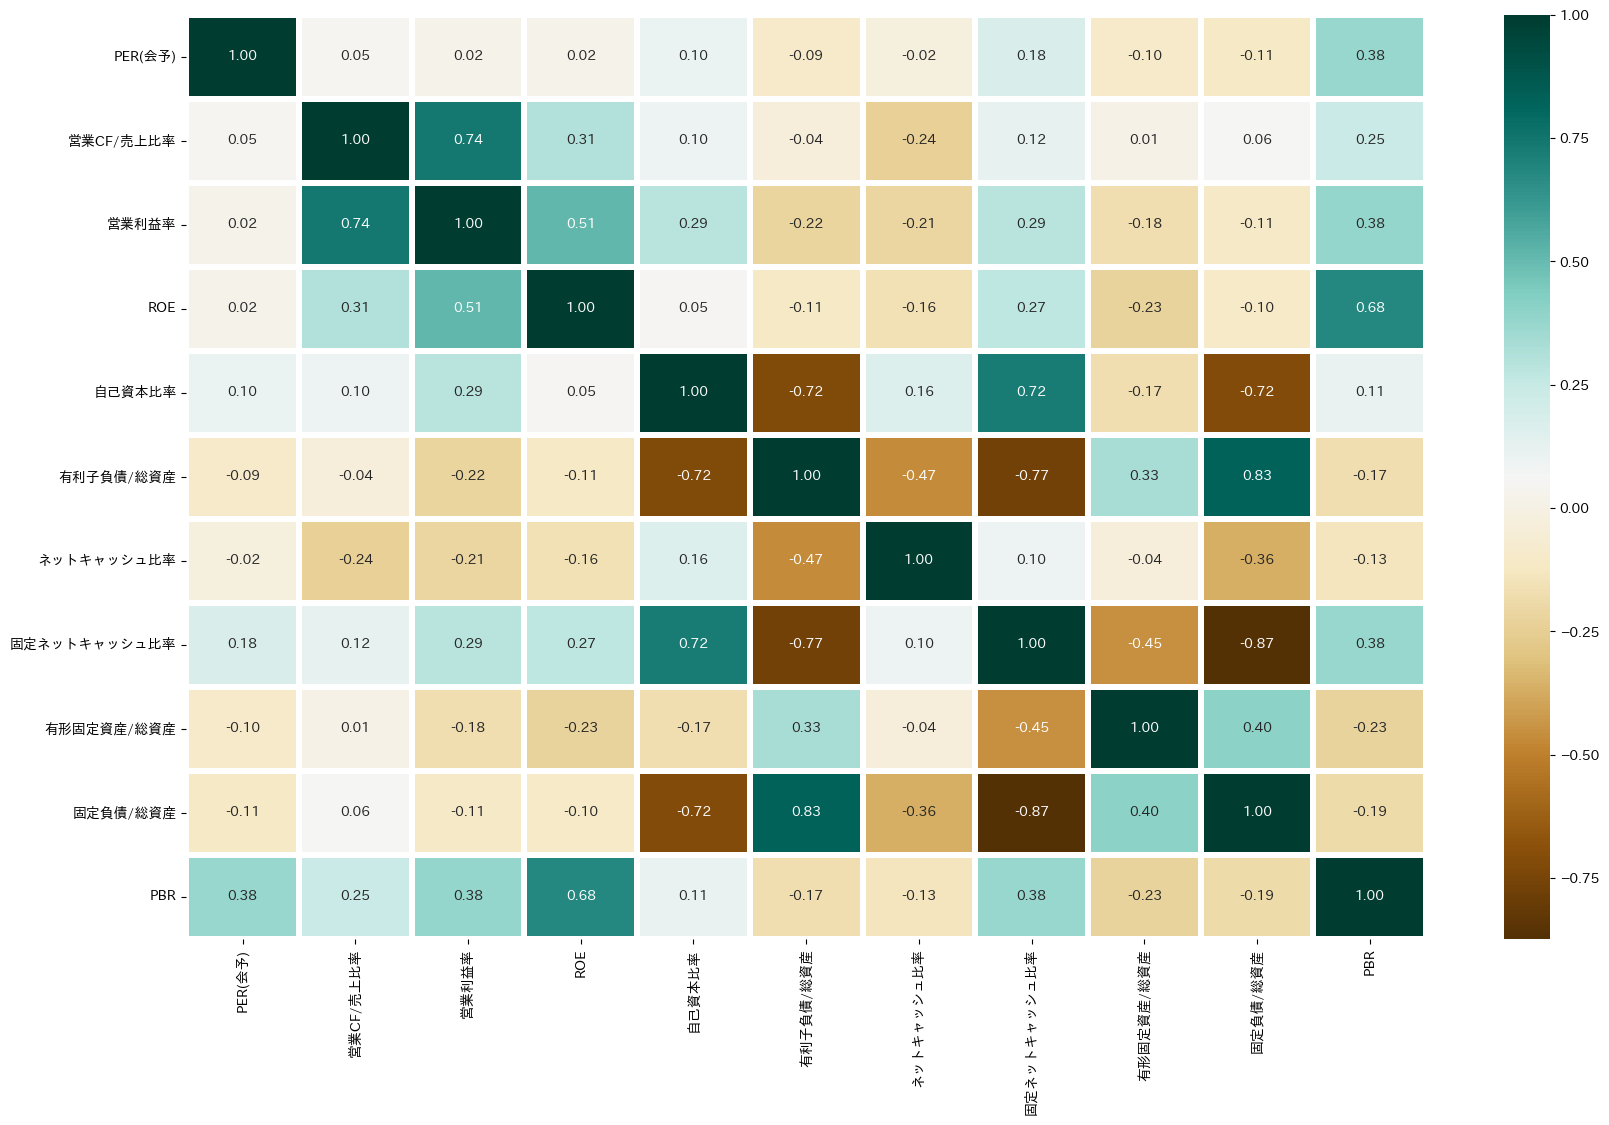

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# data内の数値列間の相関係数を'corr'に代入
corr = r_df.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4,annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

In [84]:

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

pipe_line = make_pipeline(StandardScaler(), LinearRegression())

r2_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='r2')
print('決定係数 (R²) scores: {}'.format(r2_scores))
print('平均決定係数 (R²): {}'.format(np.mean(r2_scores)))

# 2. 平均二乗誤差 (MSE)
mse_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_squared_error')
print('平均二乗誤差 (MSE) scores: {}'.format(mse_scores))
# MSEは負の値で返されるので、符号を変換して表示
print('平均二乗誤差 (MSE): {}'.format(np.mean(mse_scores)))

# 3. 平均絶対誤差 (MAE)
mae_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_absolute_error')
print('平均絶対誤差 (MAE) scores: {}'.format(mae_scores))
# MAEは負の値で返されるので、符号を変換して表示
print('平均絶対誤差 (MAE): {}'.format(np.mean(mae_scores)))

決定係数 (R²) scores: [0.67425022 0.73236559 0.60562784 0.37760461 0.62834268]
平均決定係数 (R²): 0.6036381859985619
平均二乗誤差 (MSE) scores: [-1.86745648 -2.1355506  -0.93741112 -4.56870131 -1.85909147]
平均二乗誤差 (MSE): -2.273642196216722
平均絶対誤差 (MAE) scores: [-0.90658214 -0.84755478 -0.69880959 -1.02579351 -0.81645788]
平均絶対誤差 (MAE): -0.8590395794395096


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

sc = StandardScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 重回帰分析
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print('係数:', lr.coef_)
print('切片:', lr.intercept_)

係数: [ 0.84152063  1.47959088  0.15104828 -0.40067261  0.68794894]
切片: 2.118122977346278


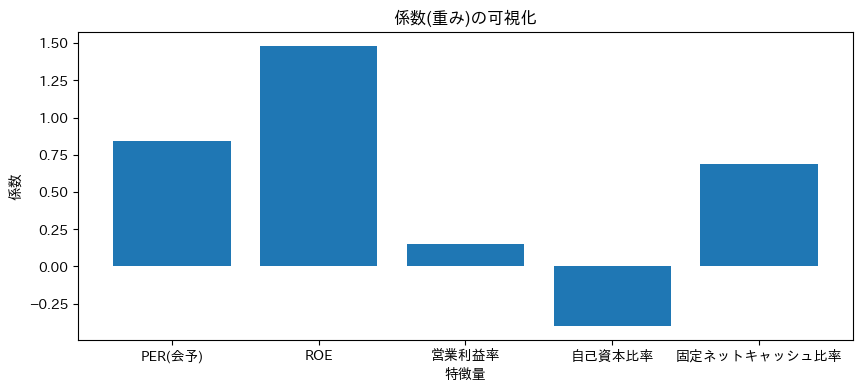

In [86]:
import matplotlib.pyplot as plt
import japanize_matplotlib

feature_names = X.columns


coefficients = lr.coef_

plt.figure(figsize=(10, 4))
plt.bar(feature_names, coefficients)
plt.xlabel('特徴量')
plt.ylabel('係数')
plt.title('係数(重み)の可視化')
plt.show()

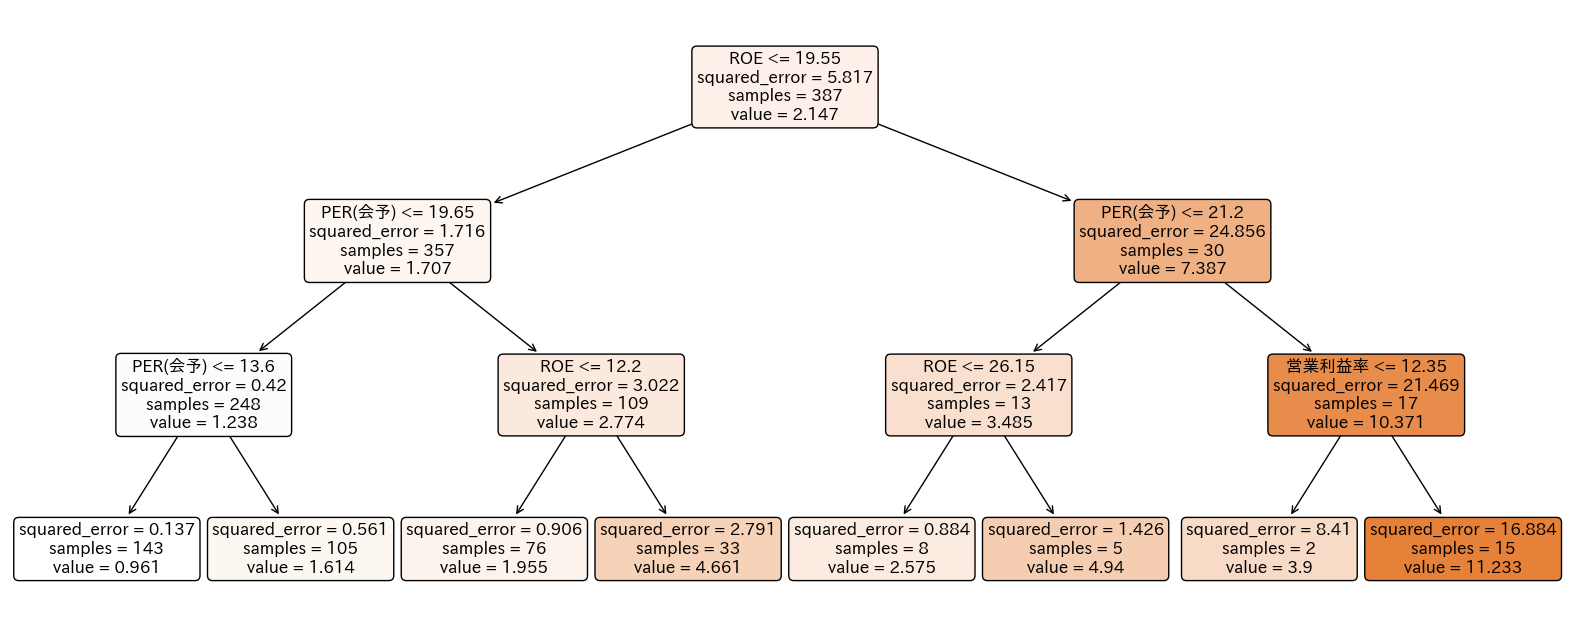

In [87]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# モデル作成と学習
dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(X, y)

# 回帰木の描画
plt.figure(figsize=(20, 8))  # サイズ調整（横12インチ × 縦8インチなど）
plot_tree(
    dtree,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.show()

## 正則化

### リッジ回帰

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Ridge回帰の交差検証付きモデル
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')

# パイプラインの作成
pipe_line = make_pipeline(StandardScaler(), ridge_cv_model)

# 1. 決定係数 (R²)
r2_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='r2')
print('決定係数 (R²) scores: {}'.format(r2_scores))
print('平均決定係数 (R²): {}'.format(np.mean(r2_scores)))

# 2. 平均二乗誤差 (MSE)
mse_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_squared_error')
print('平均二乗誤差 (MSE) scores: {}'.format(mse_scores))
print('平均二乗誤差 (MSE): {}'.format(-np.mean(mse_scores)))

# 3. 平均絶対誤差 (MAE)
mae_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_absolute_error')
print('平均絶対誤差 (MAE) scores: {}'.format(mae_scores))
print('平均絶対誤差 (MAE): {}'.format(-np.mean(mae_scores)))


決定係数 (R²) scores: [0.67405205 0.72436023 0.61645713 0.37964159 0.63347806]
平均決定係数 (R²): 0.6055978107856228
平均二乗誤差 (MSE) scores: [-1.86859254 -2.19942821 -0.91167021 -4.55374881 -1.83340347]
平均二乗誤差 (MSE): 2.2733686473869703
平均絶対誤差 (MAE) scores: [-0.90160536 -0.84573286 -0.68720755 -1.00304534 -0.79973477]
平均絶対誤差 (MAE): 0.8474651790715063


In [89]:
X

,PER(会予),ROE,営業利益率,自己資本比率,固定ネットキャッシュ比率
0,17.7,4.8,10.3,45.0,-15.396873
2,30.4,19.7,11.8,61.8,18.321158
3,23.7,10.5,9.9,44.0,-3.607947
4,20.8,11.9,10.7,22.7,-38.588489
7,8.1,13.8,11.9,37.9,-21.221911
...,...,...,...,...,...
493,10.2,10.6,1.4,24.0,-3.482661
494,7.7,7.5,4.0,39.7,-19.636967
495,12.8,4.2,4.9,50.1,-22.423198
496,19.3,27.2,13.9,53.5,33.759335


In [90]:
import pandas as pd
import numpy as np

# 会社名
company_names = ['明豊ファシリティワークス', 'AREHD', '湖北工業', 'アドバンテッジリスクマネジメント', '相鉄HD',
                 'ナレルグループ', '岡村製作所', 'NexTone',]

# 特徴量データ (PER(会予), ROE, 営業利益率, 自己資本比率, 固定ネットキャッシュ比率)
X_new = np.array([
    [11.9, 14.8, 21.5, 69.5, 0],      # 明豊ファシリティワークス
    [8.4, 11.3, 3.9, 25.8, -7],       # AREHD
    [16.9, 13.9, 24.7, 83.3, 14.23],      # 湖北工業
    [12.2, 19.03, 11.9, 44.8, -1.64],   # アドバンテッジリスクマネジメント
    [10.0, 12.3, 12.9, 24.0, -54.81],   # 相鉄HD
    [8.3, 16.2, 14.4, 58.7, 2.56],    # ナレルグループ
    [9.2, 11.9, 7.6, 64, -7.74], # 岡村製作所
    [15.8, 25.22, 5.18, 32.1, 61.25], # NexTone
#    [12.04, 9.08, 19.6, ], # 三菱UFJ 
])

# 特徴量名 (4つに合わせる)
feature_names = list(X.columns)

# 標準化 (既存のsc = StandardScalerを使う)
X_new_sc = sc.transform(X_new)

# PBR予測
lr_pred = lr.predict(X_new_sc)

# データフレーム化
result_df = pd.DataFrame(X_new, columns=feature_names)
result_df['会社名'] = company_names
result_df['予測PBR'] = lr_pred

# 列の順序を並べ替え（会社名を先頭）
result_df = result_df[['会社名'] + feature_names + ['予測PBR']]

# 表示
print(result_df)


                会社名  PER(会予)    ROE  営業利益率  自己資本比率  固定ネットキャッシュ比率     予測PBR
0      明豊ファシリティワークス     11.9  14.80  21.50    69.5          0.00  2.595044
1             AREHD      8.4  11.30   3.90    25.8         -7.00  2.025551
2              湖北工業     16.9  13.90  24.70    83.3         14.23  2.852159
3  アドバンテッジリスクマネジメント     12.2  19.03  11.90    44.8         -1.64  3.939463
4              相鉄HD     10.0  12.30  12.90    24.0        -54.81  1.171501
5           ナレルグループ      8.3  16.20  14.40    58.7          2.56  2.893153
6             岡村製作所      9.2  11.90   7.60    64.0         -7.74  1.412799
7           NexTone     15.8  25.22   5.18    32.1         61.25  7.590730


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [91]:
# 特徴量データ (PER(会予), ROE, 営業利益率, 自己資本比率, 固定ネットキャッシュ比率)

X_new = np.array([
     [15.8, 20, 5.18, 32.1, 61.25],  # NexTone(ROE抑えめ)
     [6.6, 6.9, 69.3, 41.4, -35.8] # アサックス
])


X_new_sc = sc.transform(X_new)

lr_pred = lr.predict(X_new_sc)

lr_pred

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([6.36881672, 0.81674145])

In [92]:
new_df = result_df[['会社名', '予測PBR']]

new_df

,会社名,予測PBR
0,明豊ファシリティワークス,2.595044
1,AREHD,2.025551
2,湖北工業,2.852159
3,アドバンテッジリスクマネジメント,3.939463
4,相鉄HD,1.171501
5,ナレルグループ,2.893153
6,岡村製作所,1.412799
7,NexTone,7.590730


In [93]:
new_df['実績PBR'] = [1.9, 1.0, 2.3, 2.4, 1.1, 1.5, 1.1, 4.2]

new_df

/var/folders/7s/_btxhv2n665301n2c0k894mm0000gn/T/ipykernel_47223/842131010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['実績PBR'] = [1.9, 1.0, 2.3, 2.4, 1.1, 1.5, 1.1, 4.2]


,会社名,予測PBR,実績PBR
0,明豊ファシリティワークス,2.595044,1.9
1,AREHD,2.025551,1.0
2,湖北工業,2.852159,2.3
3,アドバンテッジリスクマネジメント,3.939463,2.4
4,相鉄HD,1.171501,1.1
5,ナレルグループ,2.893153,1.5
6,岡村製作所,1.412799,1.1
7,NexTone,7.590730,4.2


In [94]:
new_df['PBR-Ratio'] = new_df['予測PBR'] / new_df['実績PBR']

df_sorted = new_df.sort_values(by='PBR-Ratio', ascending=False)

df_sorted

/var/folders/7s/_btxhv2n665301n2c0k894mm0000gn/T/ipykernel_47223/3771652304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['PBR-Ratio'] = new_df['予測PBR'] / new_df['実績PBR']


,会社名,予測PBR,実績PBR,PBR-Ratio
1,AREHD,2.025551,1.0,2.025551
5,ナレルグループ,2.893153,1.5,1.928769
7,NexTone,7.590730,4.2,1.807317
3,アドバンテッジリスクマネジメント,3.939463,2.4,1.641443
0,明豊ファシリティワークス,2.595044,1.9,1.365813
6,岡村製作所,1.412799,1.1,1.284362
2,湖北工業,2.852159,2.3,1.240069
4,相鉄HD,1.171501,1.1,1.065001


In [95]:
new_df.describe()

,予測PBR,実績PBR,PBR-Ratio
count,8.000000,8.000000,8.000000
mean,3.060050,1.937500,1.544791
std,2.033223,1.064945,0.354510
min,1.171501,1.000000,1.065001
25%,1.872363,1.100000,1.273289
50%,2.723602,1.700000,1.503628
75%,3.154731,2.325000,1.837680
max,7.590730,4.200000,2.025551
